In [1]:

from nltk.util import pr
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
from nltk.corpus import stopwords
import string
import pickle
from sklearn.naive_bayes import GaussianNB 
import joblib
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [20]:
data = pd.read_csv("../Davidson_Dataset/Tweet_Offensive/data/labeled_data.csv")
print(data)

       Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @m

In [19]:

data["labels"] = data["class"].map({0: "Hate Speech", 1: "Offensive Language", 2: "No Hate and Offensive"})
#print(data.head())

data = data[["tweet", "labels"]]
#print(data.head())

print(data.head())



                                               tweet                 labels
0  !!! RT @mayasolovely: As a woman you shouldn't...  No Hate and Offensive
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...     Offensive Language
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...     Offensive Language
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...     Offensive Language
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     Offensive Language


In [4]:
# Preprocessing the text data 
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)
#print(data.head())


Offensive Language       19190
No Hate and Offensive     4163
Hate Speech               1430
Name: labels, dtype: int64


<AxesSubplot:>

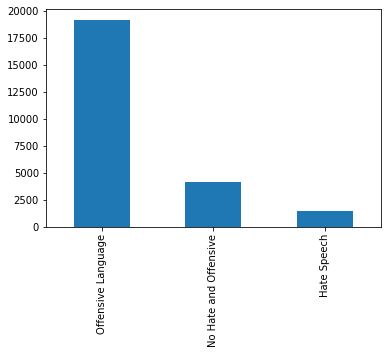

In [5]:
vis = data['labels'].value_counts()
print(vis)
vis.plot(kind = 'bar')

In [6]:
x = np.array(data["tweet"])
y = np.array(data["labels"])


In [7]:

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(x) # Fit the Data

vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(x) # Fit the Data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.33, random_state=42)



tf = TfidfVectorizer()
X_tf = tf.fit_transform(x) # Fit the Data
X_trainTf, X_testTf, y_trainTf, y_testTf = train_test_split(X_tf, y, test_size=0.33, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [8]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X_train.toarray())

In [9]:
#X_train_scaled = scaler.transform(X_train.toarray())

In [10]:
# Training the model
decision_clf = DecisionTreeClassifier()
decision_clf.fit(X_train,y_train)

decision_clf_2 = DecisionTreeClassifier()
decision_clf_2.fit(X2_train,y2_train)

decision_clf_tf = DecisionTreeClassifier()
decision_clf_tf.fit(X_trainTf,y_trainTf)

DecisionTreeClassifier()

In [11]:
decision_mnb = MultinomialNB()
decision_mnb.fit(X_train,y_train)

decision_mnb_2 = MultinomialNB()
decision_mnb_2.fit(X2_train,y2_train)

decision_mnb_tf = MultinomialNB()
decision_mnb_tf.fit(X_trainTf,y_trainTf)

MultinomialNB()

In [12]:
# Normalisation has lead to lower accuracy 
#clf.score(X_test,y_test)

In [17]:
print("Ngram range (1,1) for Count Vectorizer using DT",decision_clf.score(X_test,y_test))
print("For TF_IDF using Decision Tree ",decision_clf_tf.score(X_testTf,y_testTf))
print("Ngram range (2,2) for Count Vectorizer using DT ",decision_clf_2.score(X2_test,y2_test))
print("For Naive Bayes",decision_mnb_tf.score(X_testTf,y_testTf))

Ngram range (1,1) for Count Vectorizer using DT 0.87504584912581
For TF_IDF using Decision Tree  0.8752903777967966
Ngram range (2,2) for Count Vectorizer using DT  0.8030321555202348
For Naive Bayes 0.7949627093776745


In [14]:
# Preparing the model for live deployment 
pickle.dump(decision_clf, open('model_decision_Tree.pkl', 'wb'))

inp = "You are very sweet" 
This reflects no hate and offensive 

inp = "I hate you and i dont like how u behave , very dirty"
Offensive 

In [21]:
inp = "You are very sweet"

# Replace this by a positive statement and see the change 
inp = vectorizer.transform([inp])
inp = inp.toarray()
print(decision_clf.predict(inp))

['No Hate and Offensive']


In [16]:
# To save and retrieve the vectorizer for later 
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']